Bienvenidos a una nueva etapa en nuestro viaje de análisis de datos. En esta sesión, retomaremos el trabajo realizado en nuestra tarea anterior, donde identificamos seis variables latentes a través del Análisis de Componentes Principales (PCA) en nuestra base de datos de tarjetas de crédito. Nuestro primer paso será transformar el conjunto de datos original, es decir, convertiremos nuestra base de 17 variables originales en seis variables latentes, permitiéndonos captar la esencia de nuestros datos de manera más concisa.

Antes de avanzar en la creación de clusters, es crucial estandarizar estos datos transformados. Utilizaremos un objeto StandardScaler para normalizar las variables latentes, asegurando que todas tengan la misma importancia en nuestro análisis posterior.

Con los datos preparados, abordaremos la tarea de determinar el número óptimo de clusters a través del Método del Codo, analizando el WCSS (Within-Cluster Sum of Squares) y visualizándolo en un Gráfico del Codo. Este paso es esencial para identificar el número de grupos en los que podemos segmentar nuestros clientes de manera eficiente.

Implementaremos el algoritmo K-Means para agrupar nuestros datos estandarizados, eligiendo k=7 como el número de clusters. Una vez ajustado nuestro modelo, concatenaremos los datos originales con las variables latentes y calcularemos los promedios de estas variables por cada cluster.

Este análisis nos proporcionará una tabla de promedios que utilizaremos para asignar labels y descripciones a cada uno de los siete clusters, con la ayuda de ChatGPT. Esta combinación de técnicas estadísticas y herramientas de IA nos permitirá descubrir patrones ocultos y comprender mejor las características de cada grupo de clientes.

Prepárate para codificar, visualizar y desentrañar las complejidades de nuestros datos a través de un enfoque multidimensional.

In [72]:
# Importar Bibliotecas

In [73]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [74]:
# Cargar el archivo CSV como un DataFrame de pandas con ';' como separador

In [75]:
df = pd.read_csv('G:/Mi unidad/Courses/Python + Excel con PY/PCA/tarjetacredito.csv', sep=';', index_col='ID')

In [76]:
# Crear y ajustar el objeto PCA a los datos

In [77]:
pca6 = PCA(n_components = 6)

In [78]:
pca6.fit(df)

PCA(n_components=6)

In [79]:
# Matriz de correlación Variables Originales y Componentes (Latentes)
# Crearemos un DataFrame llamado df_pca6componentes, que contiene las cargas de los seis primeros componentes
# principales obtenidos del PCA. Estas cargas representan la correlación de cada variable original con los
# componentes y son clave para interpretar la contribución de cada variable a los componentes identificados.

In [80]:
df_pca6componentes = pd.DataFrame(data=pca6.components_,
                                 columns = df.columns.values,
                                 index = ["Componente 1", "Componente 2", "Componente 3", "Componente 4", "Componente 5", "Componente 6"])

In [81]:
df_pca6componentes

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,transacciones.adelanto,transacciones.compras,limite.credito,monto.pagado,pago.minimo,pago.total.prct,tenencia
Componente 1,0.291744,0.000008,0.292490,0.210648,0.081837,0.216248,0.000013,0.000023,0.000008,0.000010,0.000405,0.002341,0.689597,0.487224,0.136254,0.000002,0.000039
Componente 2,-0.300770,-0.000005,0.501524,0.380909,0.120654,-0.204715,0.000037,0.000028,0.000030,-0.000019,-0.000505,0.003520,-0.447094,0.470304,-0.188047,0.000026,0.000003
Componente 3,0.275369,0.000012,-0.096010,-0.077512,-0.018525,0.396795,-0.000030,-0.000028,-0.000017,0.000029,0.000991,-0.000956,-0.507108,0.292246,0.639209,-0.000027,-0.000026
Componente 4,0.054855,0.000010,0.294864,0.186013,0.108868,-0.565114,0.000045,0.000025,0.000038,-0.000032,-0.001164,0.003093,0.090638,-0.363734,0.635382,0.000001,0.000053
Componente 5,-0.719933,-0.000043,-0.288772,-0.279678,-0.009019,-0.139372,0.000005,-0.000021,0.000011,-0.000034,-0.000710,-0.002234,0.230880,0.368635,0.333735,0.000057,0.000067
Componente 6,0.476541,0.000014,-0.269159,-0.302693,0.033619,-0.632894,-0.000015,-0.000032,0.000007,-0.000021,-0.001098,-0.000970,-0.073590,0.426177,-0.141806,-0.000027,0.000176


In [82]:
pca6.components_

array([[ 2.91743550e-01,  8.48057087e-06,  2.92490440e-01,
         2.10648351e-01,  8.18365209e-02,  2.16248317e-01,
         1.29742082e-05,  2.27287105e-05,  8.46749643e-06,
         1.02259170e-05,  4.04882716e-04,  2.34066340e-03,
         6.89596929e-01,  4.87223673e-01,  1.36254497e-01,
         2.31648511e-06,  3.94234308e-05],
       [-3.00770499e-01, -4.59880627e-06,  5.01523648e-01,
         3.80909326e-01,  1.20654123e-01, -2.04715318e-01,
         3.70532319e-05,  2.84233106e-05,  3.02007822e-05,
        -1.94250675e-05, -5.05063436e-04,  3.51980755e-03,
        -4.47094079e-01,  4.70304265e-01, -1.88046747e-01,
         2.55854191e-05,  2.85260328e-06],
       [ 2.75369452e-01,  1.19931054e-05, -9.60104160e-02,
        -7.75121662e-02, -1.85250909e-02,  3.96794994e-01,
        -3.04785193e-05, -2.81032701e-05, -1.69811545e-05,
         2.85945642e-05,  9.91411299e-04, -9.55936235e-04,
        -5.07108012e-01,  2.92246413e-01,  6.39208636e-01,
        -2.71970762e-05, -2.5

In [83]:
# Mapa de Calor: Ayuda a identificar rápidamente qué variables contribuyen más a cada componente principal, facilitando la 
# interpretación de las dimensiones reducidas del PCA.

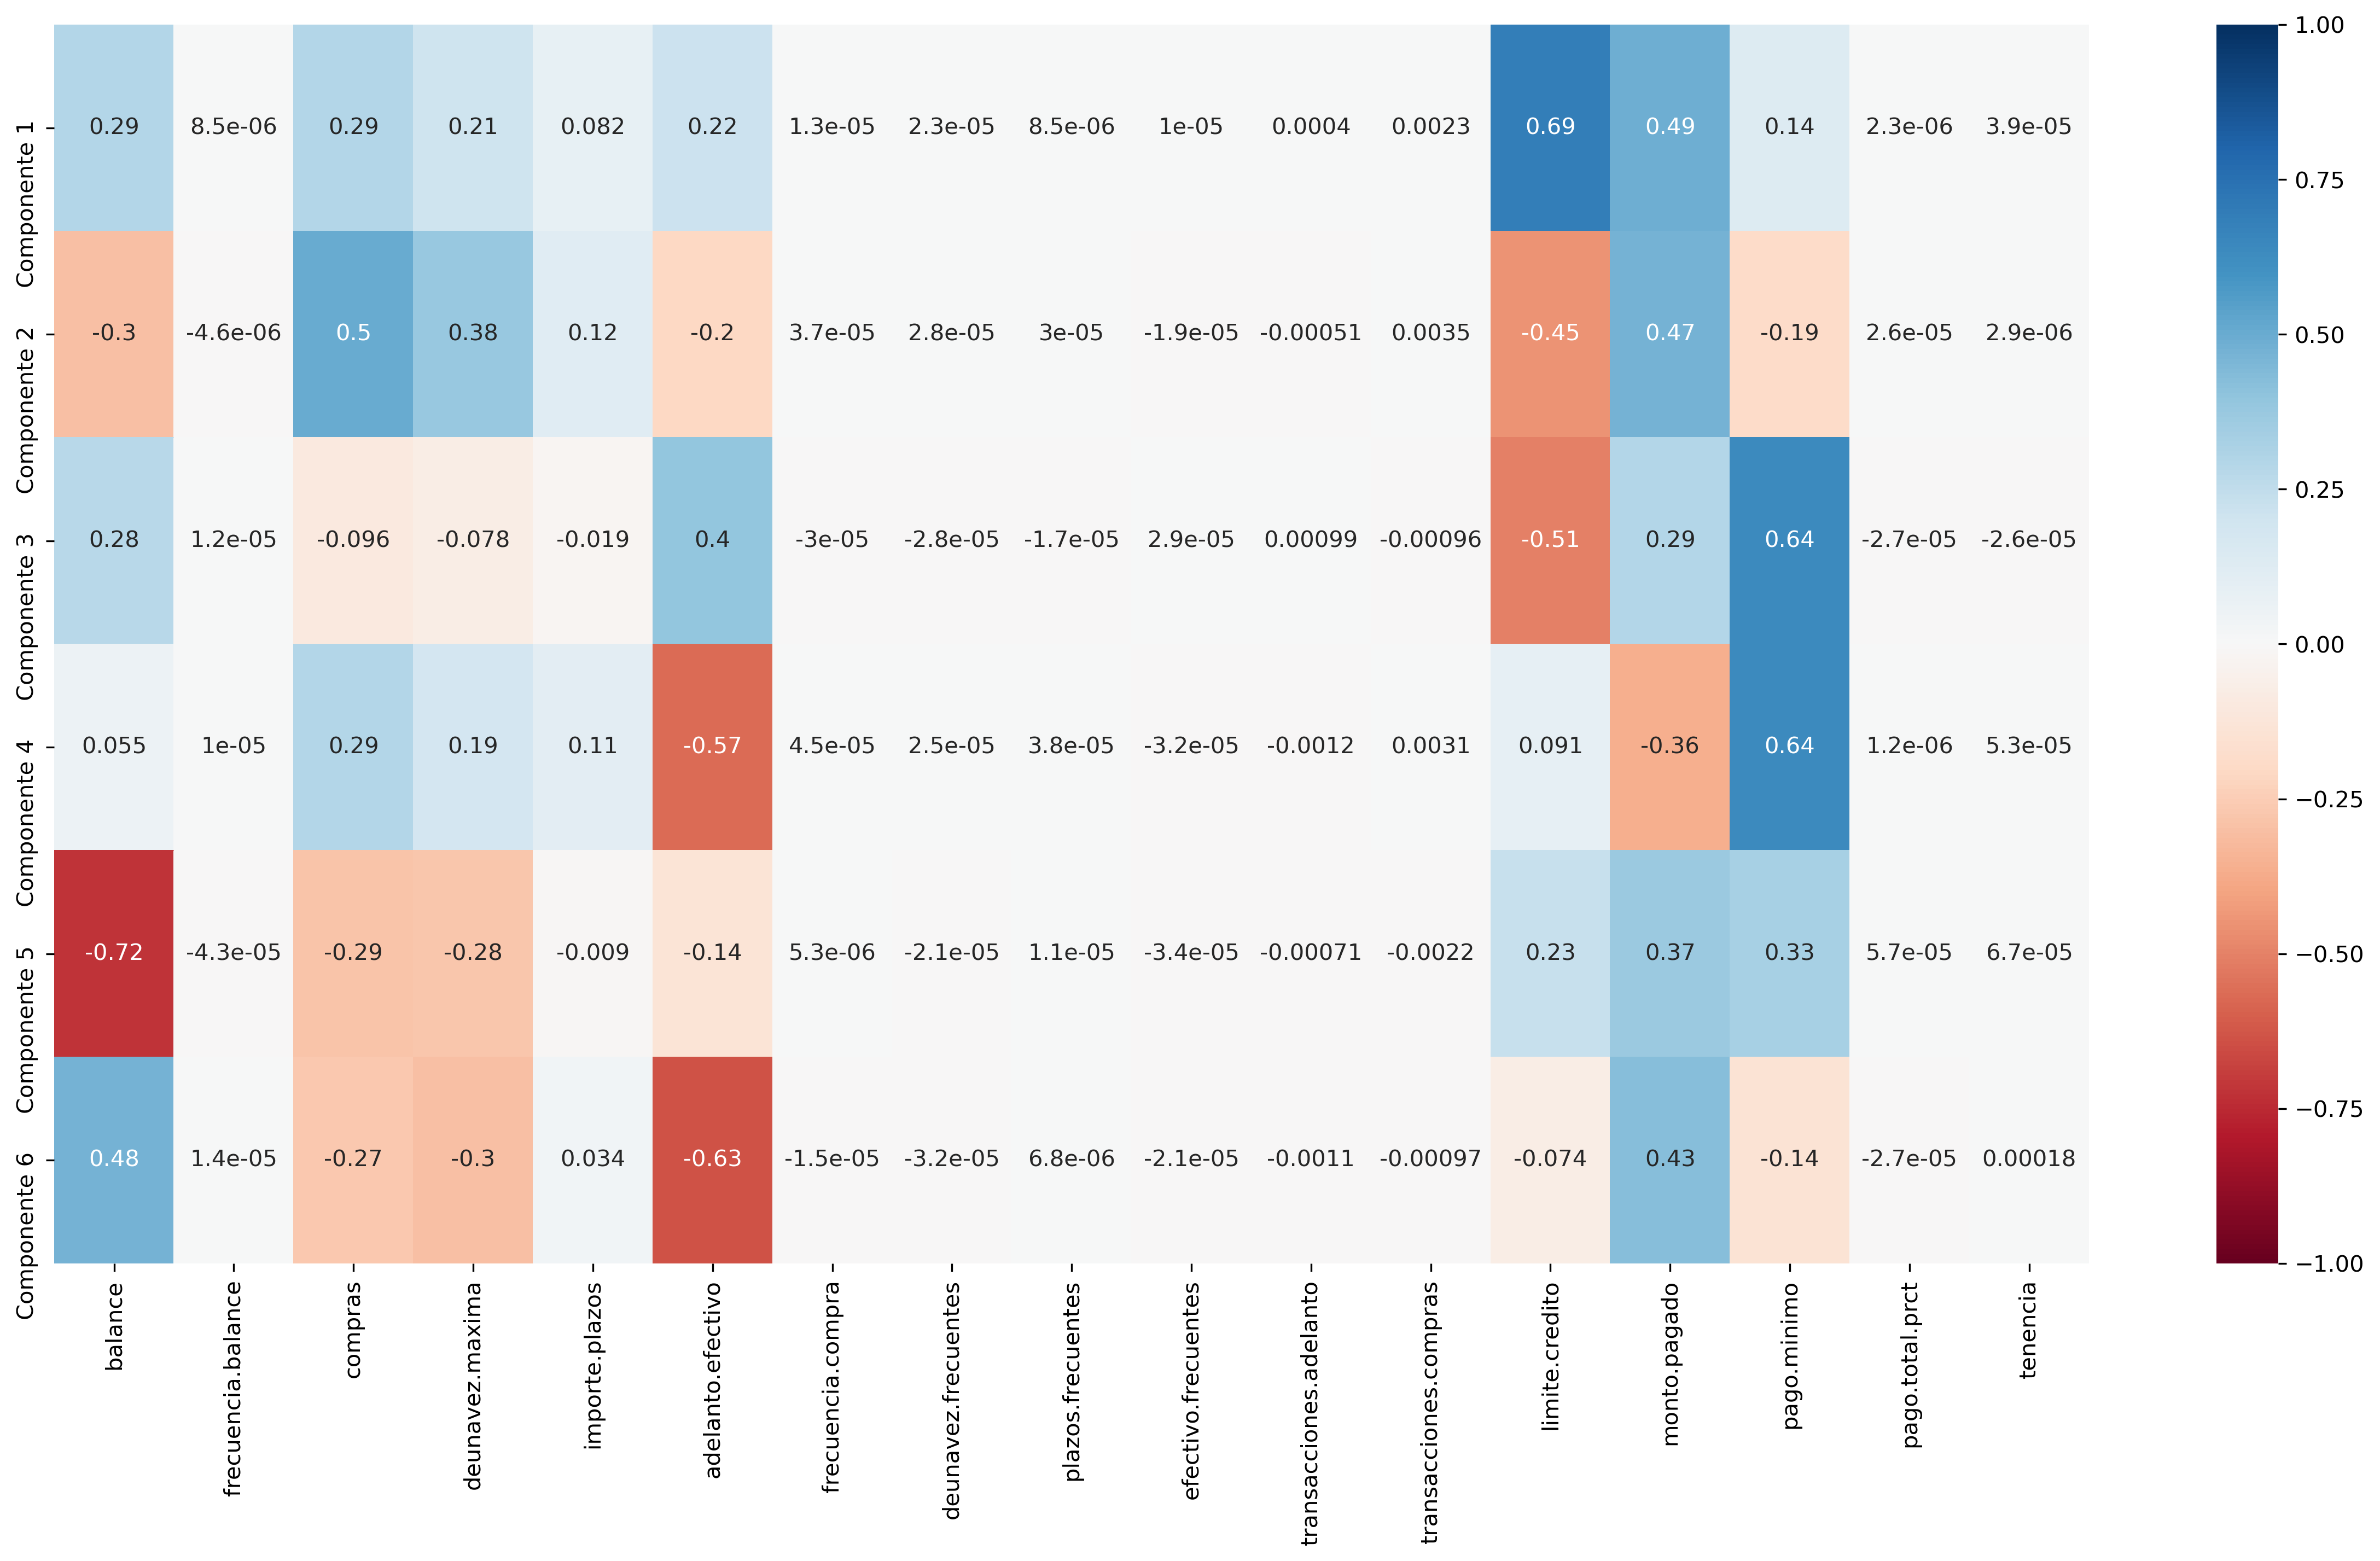

In [84]:
plt.figure(figsize = (20,10), dpi = 300)
mapa = sns.heatmap(df_pca6componentes,
                annot = True,
                cmap = "RdBu",
                vmin = -1,
                vmax =  1)

Componente 1 - "Actividad Financiera": Este componente podría representar la actividad financiera general, ya que está altamente correlacionado con limite.credito y monto.pagado, lo que implica un enfoque en el uso y pago del crédito disponible.

Componente 2 - "Gestión de Compras": Con fuertes correlaciones con compras y deunavez.maxima, este componente puede reflejar la gestión de compras, incluyendo tanto la frecuencia como el volumen de las compras realizadas.

Componente 3 - "Responsabilidad de Pago": Altamente correlacionado con pago.minimo, este componente podría estar captando la responsabilidad de pago, indicando cuán comprometidos están los usuarios con sus obligaciones de pago.

Componente 4 - "Aversión al Efectivo": Una fuerte correlación negativa con adelanto.efectivo sugiere una aversión al uso de efectivo, reflejando una preferencia por evitar transacciones que incrementen la deuda inmediata.

Componente 5 - "Conservación de Saldo": La correlación negativa significativa con balance sugiere que este componente refleja la conservación del saldo en la cuenta, posiblemente indicando un enfoque conservador hacia el gasto.

Componente 6 - "Cautela Crediticia": Este componente muestra una fuerte correlación negativa con balance y adelanto.efectivo, lo que podría interpretarse como una cautela crediticia, reflejando un uso prudente del crédito y una preferencia por no acumular deuda.

Estos labels describen las características financieras y de comportamiento que cada componente principal está capturando de los datos, en lugar de centrarse en las características del cliente. Estas interpretaciones ayudan a entender las dimensiones más significativas de variabilidad en el conjunto de datos desde una perspectiva de análisis financiero.

In [ ]:
# Transformar el conjunto de datos df a un espacio de características de 6 
# dimensiones basado en los componentes principales identificados por el modelo PCA pca6
# En cristiano... transformamos nuestra base de 17 variables originales a 6 variables latentes

In [85]:
scores_pca6 = pca6.transform(df)

In [86]:
scores_pca6

array([[-4.32250297e+03,  9.12075900e+02,  2.11345568e+02,
        -1.43620714e+02,  6.10556423e+01,  9.52898755e+00],
       [ 4.12288176e+03, -2.44037939e+03,  2.34315136e+03,
        -3.93220261e+03,  5.01156080e+01, -1.45029925e+03],
       [ 1.50043702e+03, -2.00332309e+03, -2.09766609e+03,
         1.07052502e+03, -2.98524756e+02,  3.91001623e+02],
       ...,
       [-4.37576493e+03,  9.01886777e+02,  1.29192870e+02,
        -1.17222345e+02, -4.42837428e+00, -5.36286620e+01],
       [-4.78724798e+03,  1.02258485e+03,  3.85624860e+02,
        -2.48557539e+02, -9.42818975e+01, -1.91533657e+01],
       [-3.62043944e+03,  1.54671969e+03, -3.49301757e-01,
         3.26062749e+02, -8.10650840e+02, -5.82022826e+02]])

In [ ]:
# Estandarizar los datos previo a hace los clústeres
# Creamos un objeto de la clase StandarScaler y luego hacemos el fit a las variables latentes

In [87]:
estandarizar = StandardScaler()

In [88]:
pca6_std = estandarizar.fit_transform(scores_pca6)

In [89]:
pca6_std

array([[-9.45689228e-01,  3.26484012e-01,  8.51306525e-02,
        -6.43155735e-02,  4.20152673e-02,  8.72165078e-03],
       [ 9.02015544e-01, -8.73551046e-01,  9.43828660e-01,
        -1.76090105e+00,  3.44869136e-02, -1.32742367e+00],
       [ 3.28269788e-01, -7.17103652e-01, -8.44946432e-01,
         4.79397636e-01, -2.05428965e-01,  3.57874285e-01],
       ...,
       [-9.57342029e-01,  3.22836744e-01,  5.20392903e-02,
        -5.24939765e-02, -3.04737321e-03, -4.90850113e-02],
       [-1.04736743e+00,  3.66041473e-01,  1.55330894e-01,
        -1.11307904e-01, -6.48798206e-02, -1.75306103e-02],
       [-7.92089817e-01,  5.53659240e-01, -1.40699835e-04,
         1.46015934e-01, -5.57847079e-01, -5.32711351e-01]])

In [ ]:
# Determinando K con el Método del Codo 
# WCSS

In [90]:
wcss = []
for i in range(1,11):
    kmediaspca6 = KMeans(n_clusters = i, init = "k-means++", random_state = 99)
    kmediaspca6.fit(pca6_std)
    wcss.append(kmediaspca6.inertia_)

In [ ]:
# Gráfico del Codo

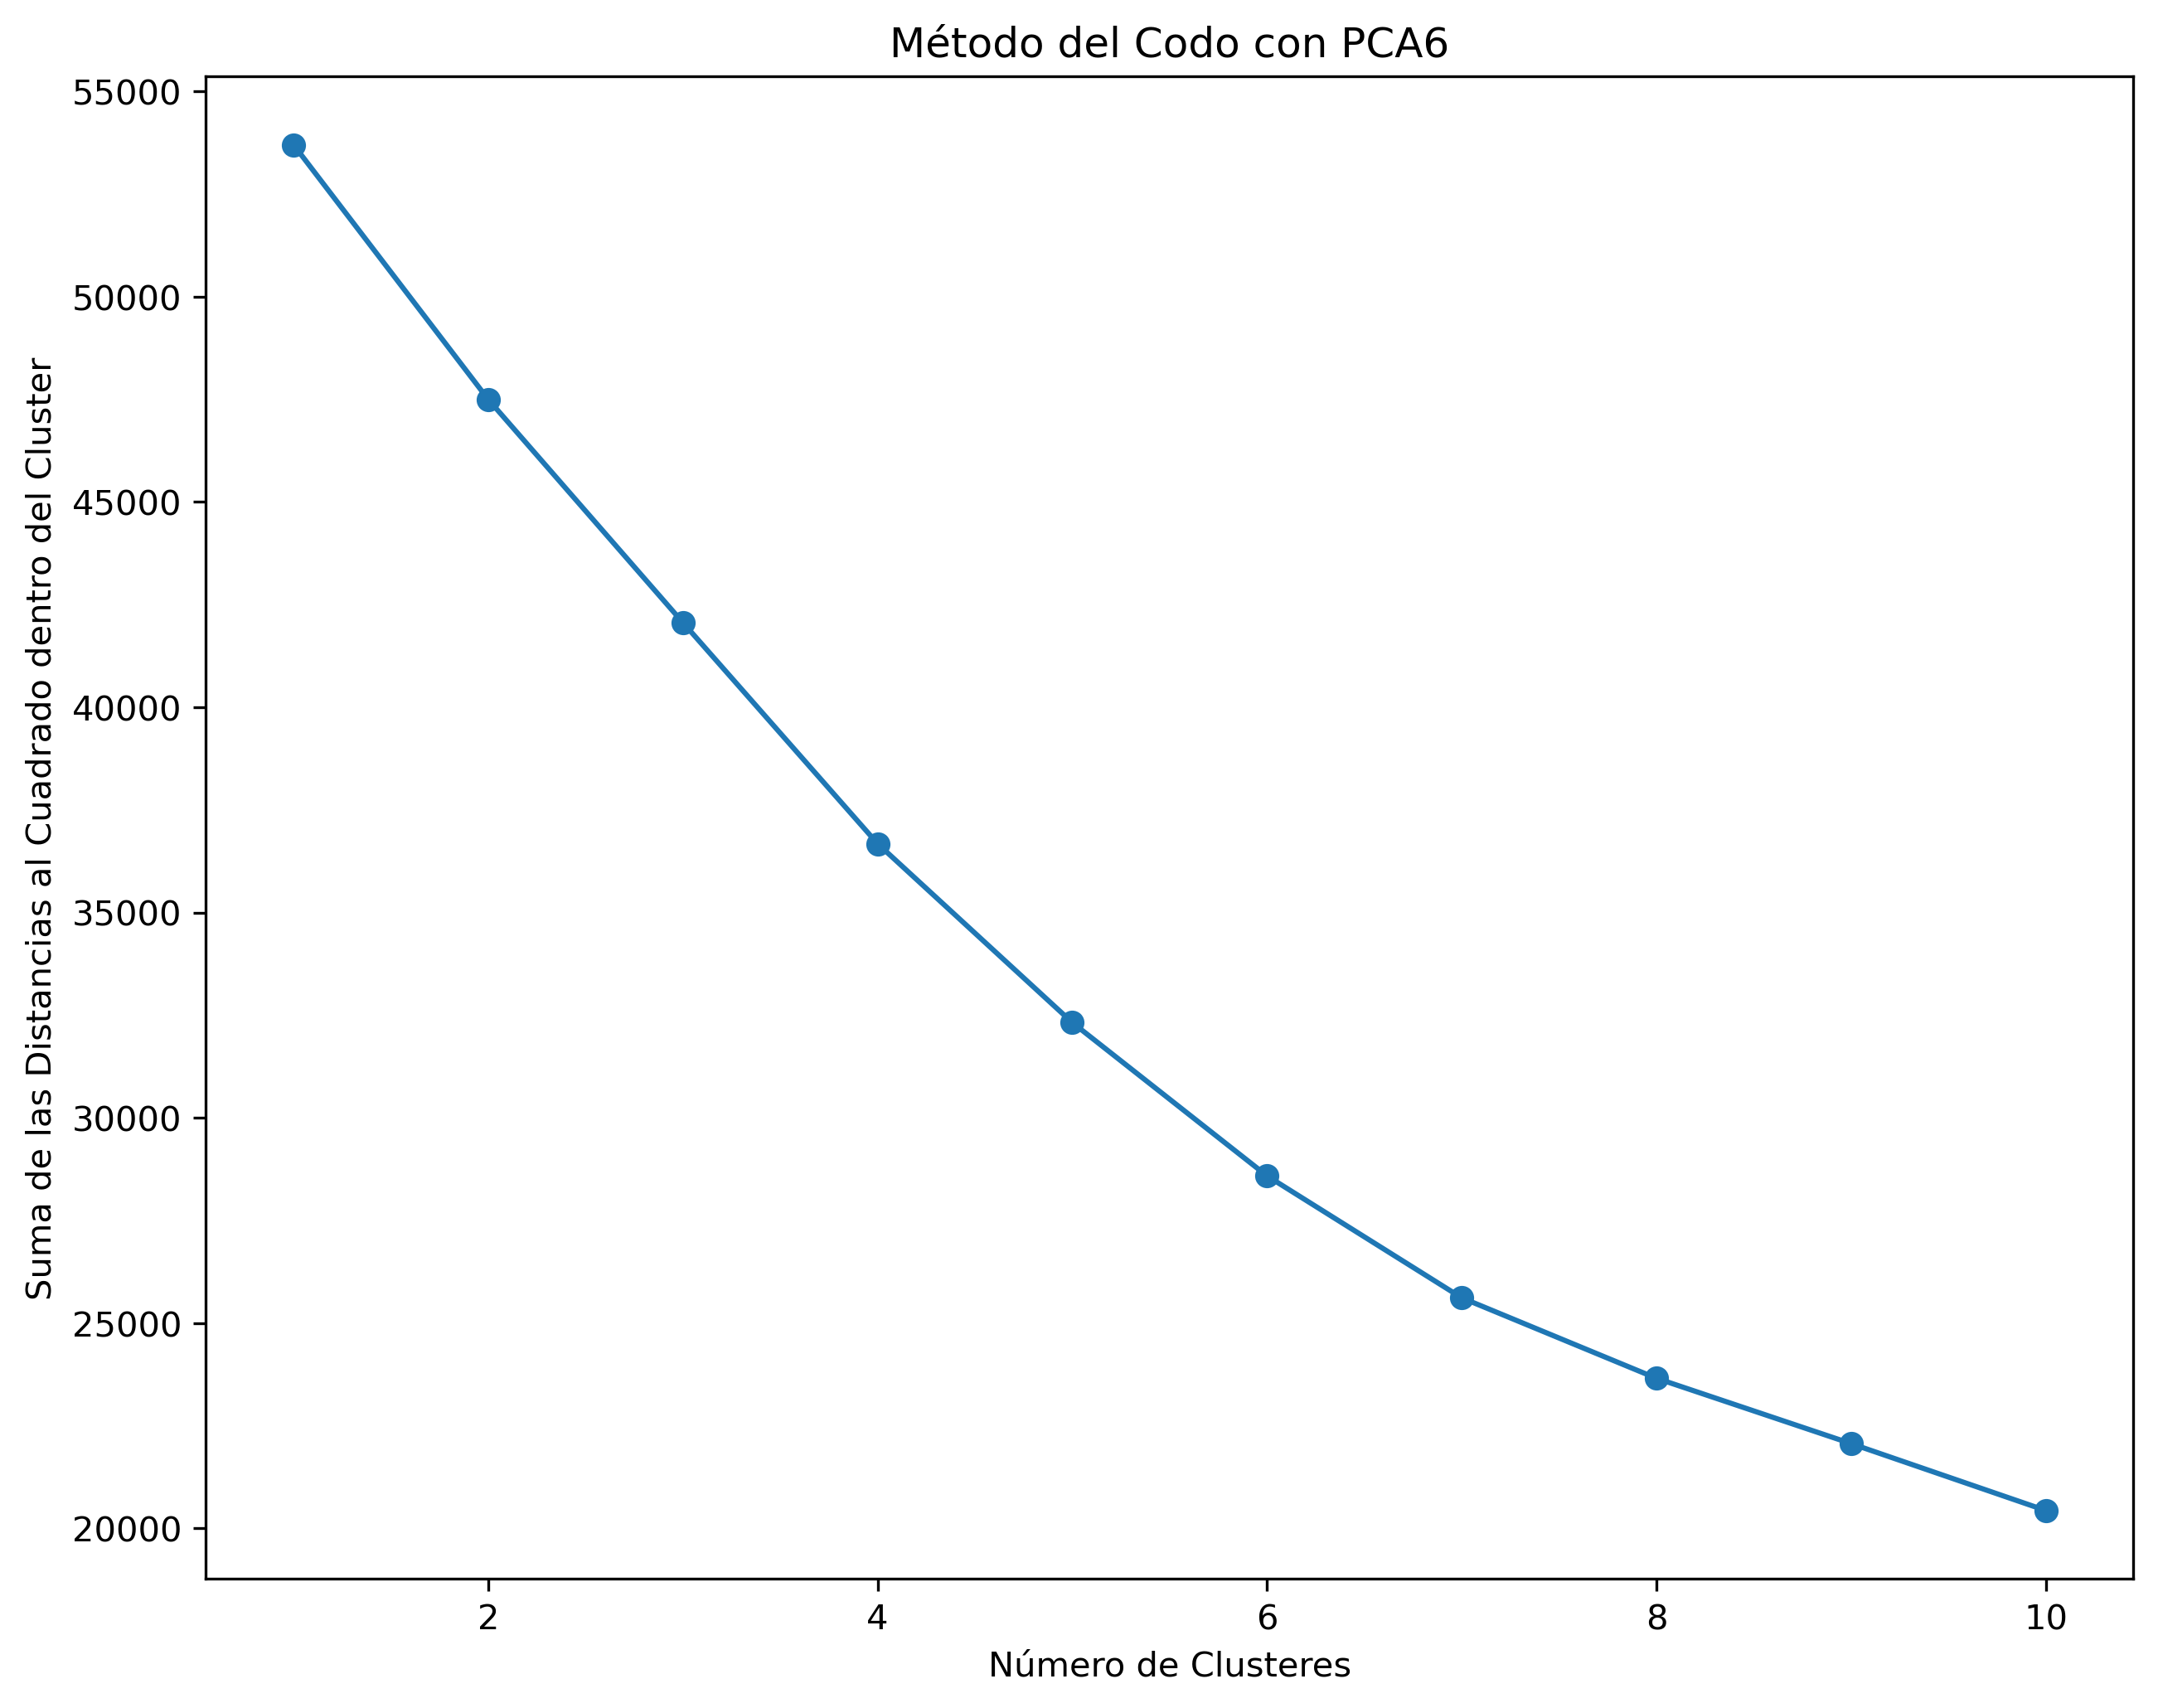

In [91]:
plt.figure(figsize = (10,8), dpi =300)
plt.plot(range(1,11), wcss, marker = "o")
plt.xlabel("Número de Clusteres")
plt.ylabel("Suma de las Distancias al Cuadrado dentro del Cluster")
plt.title("Método del Codo con PCA6")
plt.show()

In [ ]:
# De acuerdo a mi interpretación del gráfico, el codo está en k = 7

In [ ]:
# Implementando K-Means Clustering
# Creamos la instancia de KMeans con k=7

In [ ]:
cluster_k7_pca6 = KMeans(n_clusters = 7, init = "k-means++", random_state = 99)

In [ ]:
# Hacemos el fit del modelo con los scores pca6 estandarizados

In [92]:
cluster_k7_pca6.fit(pca6_std)

KMeans(n_clusters=7, random_state=99)

In [ ]:
# Concatenemos un df con las variables originales y las latentes

In [94]:
df_k7_pca6 = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca6)], axis = 1)

In [95]:
df_k7_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,0,1,2,3,4,5
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,61.055642,9.528988
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,50.115608,-1450.299249
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,-298.524756,391.001623
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,-581.994140,-725.259494
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,-221.902588,566.473886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,325.594462,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,27.084979,23.120095
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,275.861322,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,-3.505129,2.329043
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,81.270775,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,-4.428374,-53.628662
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,52.549959,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,-94.281898,-19.153366


In [ ]:
#Agregamos nombres a las variables latentes

In [96]:
df_k7_pca6.columns.values[-6:] = ["ActividadFinanciera", "GestionCompras", "ResponsabilidadPago", "AversionEfectivo", "ConservacionSaldo", "CautelaCrediticia"]

In [97]:
df_k7_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,61.055642,9.528988
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,50.115608,-1450.299249
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,-298.524756,391.001623
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,-581.994140,-725.259494
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,-221.902588,566.473886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,325.594462,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,27.084979,23.120095
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,275.861322,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,-3.505129,2.329043
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,81.270775,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,-4.428374,-53.628662
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,52.549959,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,-94.281898,-19.153366


In [ ]:
# Agreguemos la columna con los clusters de cluster_k7_pca6

In [98]:
df_k7_pca6['Clusters7'] = cluster_k7_pca6.labels_

In [99]:
df_k7_pca6

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,pago.minimo,pago.total.prct,tenencia,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia,Clusters7
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,139.509787,0.000000,12,-4322.502965,912.075900,211.345568,-143.620714,61.055642,9.528988,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1072.340217,0.222222,12,4122.881755,-2440.379395,2343.151356,-3932.202605,50.115608,-1450.299249,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,627.284787,0.000000,12,1500.437024,-2003.323087,-2097.666094,1070.525020,-298.524756,391.001623,6
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0.000000,12,1279.846965,-1330.413945,-2952.847025,1085.486488,-581.994140,-725.259494,6
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,244.791237,0.000000,12,-3739.093063,748.091636,538.547761,-220.143831,-221.902588,566.473886,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,48.886365,0.500000,6,-4204.883548,1112.855914,163.758991,-167.878712,27.084979,23.120095,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,0.000000,6,-4235.167897,1106.984318,114.395238,-177.776138,-3.505129,2.329043,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,82.418369,0.250000,6,-4375.764932,901.886777,129.192870,-117.222345,-4.428374,-53.628662,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,55.755628,0.250000,6,-4787.247978,1022.584853,385.624860,-248.557539,-94.281898,-19.153366,5


In [ ]:
# Estimemos el promedio de las variables por cluster

In [100]:
medias_agrupadas = df_k7_pca6.groupby(["Clusters7"]).mean()

In [101]:
medias_agrupadas 

,balance,frecuencia.balance,compras,deunavez.maxima,importe.plazos,adelanto.efectivo,frecuencia.compra,deunavez.frecuentes,plazos.frecuentes,efectivo.frecuentes,...,monto.pagado,pago.minimo,pago.total.prct,tenencia,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia
Clusters7,,,,,,,,,,,,,,,,,,,,,
0,3194.610963,0.787396,1657.244511,837.436467,819.927609,3071.245640,0.390284,0.187150,0.317147,0.218873,...,11568.691220,1350.356515,0.170872,11.842391,9055.479497,2143.033716,2196.544065,-3666.686609,3072.347492,3015.645524
1,3710.491296,0.916600,653.260242,416.582646,236.677596,6858.502532,0.294268,0.141917,0.199159,0.456916,...,3941.799045,1279.614749,0.048893,10.961616,4733.757530,-2359.138571,2542.072619,-3636.515842,-629.307078,-1876.635943
2,4045.300102,0.987762,1002.312308,192.171538,810.140769,1313.474904,0.486742,0.059878,0.444639,0.113782,...,1747.322162,23684.084300,0.003205,11.903846,3734.121620,-5125.061585,15545.666871,14411.976981,5863.377121,-2115.071784
3,6053.042991,0.999094,1326.649208,774.704455,552.027611,1805.579027,0.462021,0.250870,0.335487,0.272072,...,2038.499719,2132.733631,0.000227,11.856436,4893.745357,-3274.210387,277.228627,1023.592167,-1963.636270,1111.006120
4,3511.058726,0.985114,15767.261250,12344.061375,3423.199875,459.487431,0.914375,0.830549,0.673731,0.044792,...,13907.198274,1841.724327,0.458321,11.950000,17972.594638,14443.764386,-1093.639417,4059.356486,-2606.700360,-1598.458522
5,890.670960,0.864450,655.327891,346.535724,309.100833,488.972894,0.470635,0.154059,0.360260,0.110510,...,1031.897898,526.197517,0.141456,11.412123,-2299.025101,691.325943,339.764385,-50.748862,-123.496174,53.236611
6,680.570488,0.850773,1385.355553,835.897566,549.977252,270.231180,0.627342,0.346290,0.432975,0.049887,...,1671.155689,288.816325,0.296219,11.825786,2266.136326,-904.957740,-2866.642543,543.937798,1223.550393,-371.954652


In [ ]:
# Hagamos un .iloc para seleccionar y llevar a ChatGPT sólo las variables que nos interesan (las latentes)

In [102]:
medias_agrupadas.iloc[:, -6:]

,ActividadFinanciera,GestionCompras,ResponsabilidadPago,AversionEfectivo,ConservacionSaldo,CautelaCrediticia
Clusters7,,,,,,
0,9055.479497,2143.033716,2196.544065,-3666.686609,3072.347492,3015.645524
1,4733.757530,-2359.138571,2542.072619,-3636.515842,-629.307078,-1876.635943
2,3734.121620,-5125.061585,15545.666871,14411.976981,5863.377121,-2115.071784
3,4893.745357,-3274.210387,277.228627,1023.592167,-1963.636270,1111.006120
4,17972.594638,14443.764386,-1093.639417,4059.356486,-2606.700360,-1598.458522
5,-2299.025101,691.325943,339.764385,-50.748862,-123.496174,53.236611
6,2266.136326,-904.957740,-2866.642543,543.937798,1223.550393,-371.954652


Basándome en las medias agrupadas por cluster de las variables latentes obtenidas por PCA y las descripciones proporcionadas, aquí están los labels y descripciones para cada uno de los 7 clusters:

Cluster 0 - "Usuarios Altamente Activos": Este cluster destaca por tener la mayor actividad financiera, indicando clientes con altos límites y pagos, pero también con tendencia a acumular deudas significativas.

Cluster 1 - "Gestores Moderados": Caracterizado por una gestión equilibrada de compras y una responsabilidad de pago adecuada, aunque con cierta tendencia a evitar el uso excesivo de efectivo.

Cluster 2 - "Pagadores Excepcionales": Este grupo sobresale en responsabilidad de pago, con la tendencia a pagar más del mínimo requerido, aunque muestra una preferencia por el uso de efectivo y un saldo relativamente alto.

Cluster 3 - "Usuarios Conservadores": Muestra una conservación de saldo y cautela crediticia, indicando clientes que probablemente evitan grandes deudas y gestionan sus finanzas de manera prudente.

Cluster 4 - "Grandes Gastadores": Este grupo se caracteriza por altas cifras en actividad financiera y gestión de compras, sugiriendo clientes que realizan transacciones grandes y frecuentes.

Cluster 5 - "Usuarios de Bajo Perfil": Marcado por valores bajos en casi todas las variables, este cluster podría representar a usuarios con menor actividad financiera y cautelosos en su gestión de compras y uso de crédito.

Cluster 6 - "Cautelosos y Equilibrados": Exhiben una cautela crediticia moderada y una gestión de compras equilibrada, lo que sugiere un uso prudente del crédito sin grandes excesos en gastos o acumulación de deuda.

Cada cluster representa un perfil único de comportamiento financiero, reflejando diferentes estilos de manejo de crédito y gastos entre los titulares de tarjetas de crédito.